In [96]:
import numpy as np
import matplotlib.pyplot as plt

### Se genera un dataset sintetico

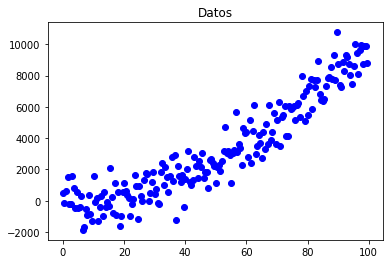

In [97]:
def f(x):  
    np.random.seed(42) 
    y = 0.5*x + x**2 + 1000*np.random.randn(x.shape[0])
    return y
    
X = np.arange(0, 100, 0.5) 
y = f(X) 
plt.scatter(X,y,label='data', color='blue')
plt.title('Datos');


### Se divide en train y test de forma aleatoria

In [98]:
def split(X, y, percentage):  
    permuted_idxs = np.random.permutation(X.shape[0])

    train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]

    test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]
 

    X_train = X[train_idxs]
    X_test = X[test_idxs]

    y_train = y[train_idxs]
    y_test = y[test_idxs]

    return X_train, X_test, y_train, y_test

### Se construyen los modelos

In [116]:
class BaseModel(object):

    def __init__(self):
        self.model = None

    def fit(self, X, Y):
        return NotImplemented

    def predict(self, X):
        return NotImplemented


class LinearRegression(BaseModel):
    def fit(self, X, y):
        if len(X.shape) == 1:
            W = X.T.dot(y) / X.T.dot(X)
        else:
            W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.model = W
    def predict(self, X):
        return self.model * X
     


class LinearRegressionWithB(BaseModel):
    def fit(self, X, y):
        X_expanded = np.vstack((X, np.ones(len(X)))).T
        W = np.linalg.inv(X_expanded.T.dot(X_expanded)).dot(X_expanded.T).dot(y)
        self.model = W
    def predict(self, X):
        X_expanded = np.vstack((X, np.ones(len(X)))).T
        points=X_expanded.dot(self.model)
        return points



class Polinom(BaseModel):
    def fit(self,X,y,d):
        W=np.polyfit(X, y, d)
        return W
    def predict(W,X):
        d = len(W) - 1
        return np.sum(W * np.power(X, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)


        

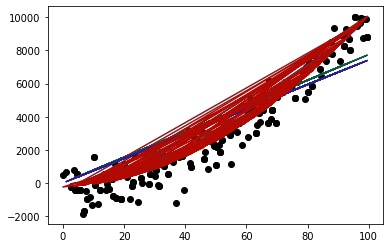

In [118]:
models=[LinearRegression,Polinom]
predict=[]
aux_=[]
d=2
n=2 # cantidad de split de dataset diferentes
col=[]

for i in range(0,n):

    for model in models:
        X_train,X_test,y_train,y_test=split(X, y, 0.7)
        plt.scatter(X_test, y_test,c="k")
        try:
            b=model.fit(model,X_train,y_train)
            aux_=model.predict(model,X_test)
        except:
            b=model.fit(model,X_train,y_train,d)
            aux_=model.predict(b,X_test)
        col = (np.random.random(), np.random.random(), np.random.random())
        plt.plot(X_test, aux_, c=col)
    
    
    

    